# HW-1

### Xichen Li, EE521 - Group 5

## Problem 11

Consider a potential (take $L = 8nm$ )

$$ U(x)=   \left\{
\begin{array}{ll}
      U_{0}=400meV & x<0 \& x>L \\
      0 & 0<x<L \\
\end{array} 
\right.  $$

a)By solving Schrödinger’s equation, find the lowest eigenvalue (energy level) and the corresponding eigenfunction. 

b)Plot the eigenfunction using a plotting package. Ensure that you present a zoomed-in plot of the eigenfunction for $𝑥<0$ and $𝑥>𝐿$.

c) Show that the eigenvalues form a discrete spectrum for energies less than $𝑈_0$ and a continuous spectrum for higher energies. That is, for this Hamiltonian, there are both discrete quantum numbers with eigenenergies smaller than $𝑈_0$ and a continuum of quantum numbers with eigenenergies larger than $𝑈_0$.


### Solution

#### A) Xichen Li: I am the only person in my group. I wrote the problem by myself. I started the problem by solving the eigenvalue and eigenfunction of the time-independent Schrödinger equation and then process the solved results.

#### a) Solve timd-indepednent Schrödinger equation:

For $0<x<L$
$$[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}] \psi(x) = E \psi(x)$$
$$-\frac{\partial^2}{\partial x^2}\psi(x)=k_1^2\psi(x)$$
Where $k_1=\frac{2mE}{\hbar^2}$, and then the general solution for $\psi(x)$ can be written as :
$$\psi(x)=A_1sin(k_1x)+B_1cos(k_1x)$$
For $x<0$ and $x>L$
$$[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+U_0] \psi(x) = E \psi(x)$$
$$-\frac{\partial^2}{\partial x^2}\psi(x)=k_2^2\psi(x)$$
Where $k_2=\frac{2m(E-U_0)}{\hbar^2}$, and then the general solution for $\psi(x)$ can be written as :
$$\psi(x)=A_2sin(k_2x)+B_2cos(k_2x)$$

Boundary Condition 1: $\psi(0^+)=\psi(0^-)$
$$A_1sin(0)+B_1cos(0)=A_2sin(0)+B_2cos(0)$$
Then $B_1=B_2$.
Boundary Condition 2: $\psi(L^+)=\psi(L^-)$
$$A_1sin(k_1L)+B_1cos(k_1L)=A_2sin(k_2L)+B_2cos(k_2L)$$

It seems hard to determine all the parameters from the two boundary conditions, so the above time-independent Schrödinger equation is solved numerically which is shown below:

In [33]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [34]:
N = 200  # Grid size is 100
L = 8e-9 

def V(x): # Return the potential energy given the position of each grid element
    if x<0 or x >L :
      result = 400e-3 * 1.6e-19
    else:
      result = 0
    return result 

eta = 6.63e-34/2/np.pi #Reduced Plank constant in eV.s
m = 9.11e-31   #Assuming the particle mass is equal to a free electron
q = 1.6e-19


In [35]:
X = np.linspace(-2*L,2*L,num=N)
a = X[1] - X[0] # grid spacing

#print(X)

U=[]
U=np.array(U, dtype=float)

for x in X:
    U=np.append(U,V(x))

#print(U)

t = -eta**2 / (2 * m * a**2)
eps = -2*t + U

#print(t)

In [36]:
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian
#plt.matshow(H)

In [37]:
vals, vecs = np.linalg.eig(H) # Solve for Eigen function and eigen values
#print(vals)
#print(vals.shape)
#print(vecs)
#print(vecs.shape)
order = np.argsort(vals) 
vals, vecs = vals[order], vecs[:, order] # sort the eigen value and eigen functions
#print(vals)
#print(vecs)
vecs = vecs.T # Transpose
vecs /= np.sqrt(a) #Normalize
vals_eV=vals/1.6e-19
#print (vals_eV)
#print(vecs[0])
p = np.abs(vecs)**2
probs = a*p
#print(sum(probs[0]))

Now we have the eigenvalues (which correspond to the energies of each state) and the eigenvectors (which are the states, aka wavefunctions).

The lowest energy is 0.0050eV
The corresponding eigenfunction is [-8.85592456e-11 -9.56054439e-11 -2.73299246e-11 -8.85605770e-11
 -5.67051899e-11  8.70094459e-12 -2.89183510e-11  1.38468949e-11
  1.84631629e-11  4.99044984e-11  9.52652336e-11  2.33326032e-11
  4.26402148e-11  2.35197976e-11 -6.28774556e-11 -2.66508167e-11
 -3.11814721e-11 -4.69053865e-11 -2.73870223e-11 -2.01532618e-11
  2.00232354e-11 -3.65512120e-11 -7.35270988e-11 -6.10492213e-11
 -4.37056890e-11 -1.90932311e-11 -7.23852865e-11 -2.71908295e-11
  1.82036282e-11 -3.56714229e-11 -1.78354207e-11 -1.64046124e-11
  6.75728594e-12  4.77352903e-11 -2.14985904e-12 -2.36968056e-11
  3.55318728e-11  5.11381690e-11  2.52075869e-11  1.39434084e-13
  3.26102925e-11  1.22714183e-10  2.01387216e-10  3.90319428e-10
  7.71641285e-10  1.29694819e-09  2.16912663e-09  3.64142754e-09
  6.10430121e-09  1.02215345e-08  1.70713663e-08  2.85435421e-08
  4.75884047e-08  7.93380505e-08  1.32307232e-07  2.20590708e-07
  3.67980098e-07  6.13780

<IPython.core.display.Javascript object>


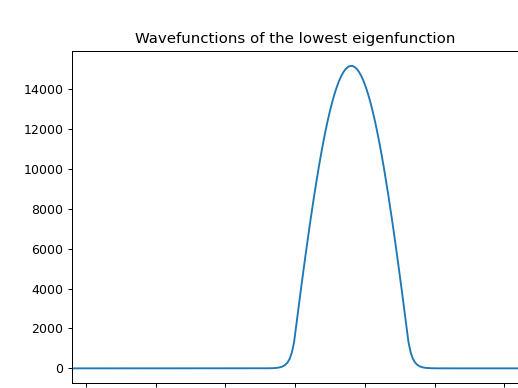

(-1.6e-08, 1.6e-08)

In [38]:
print ("The lowest energy is {:.4f}eV".format(vals_eV[0]))
print ("The corresponding eigenfunction is {}".format(vecs[0]))
print ("Verfiy the summed probablity of the frist eigenfunction: {} is equal to 1".format(sum(probs[0])))
#plot the first eigenfunction magnitude
plt.figure()
plt.plot(X,vecs[0],'-')
plt.title('Wavefunctions of the lowest eigenfunction')
plt.xlabel('x')
plt.xlim([-2*L,2*L])
#plt.ylim([-7000,-4000])

#### b) Plot the eigenfunction of the lowest four eigenfunctions.

<IPython.core.display.Javascript object>


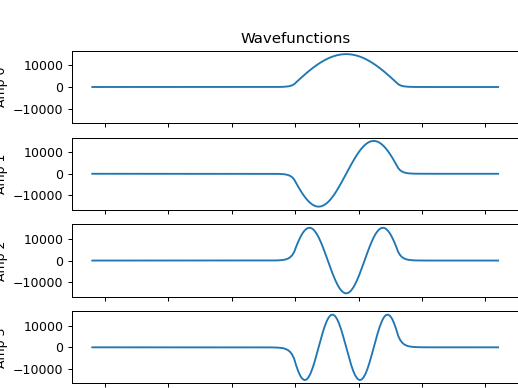

E_0 = 0.0050
E_1 = 0.0200
E_2 = 0.0448
E_3 = 0.0794


Text(0.5, 0, 'x')

In [39]:
fig, axes = plt.subplots(4, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Wavefunctions')
for i, (ax, Amp, E) in enumerate(zip(axes, vecs, vals_eV)):
    plt.sca(ax)
    plt.ylabel('Amp {}'.format(i))
    plt.plot(X, Amp)
    #plt.fill_between(X, psi, alpha=0.3)
    print('E_{} = {:.4f}'.format(i, E))
plt.xlabel('x')

A zoomed-in plot of the lowest eigenfunction for $x<0$ is shown below:

<IPython.core.display.Javascript object>


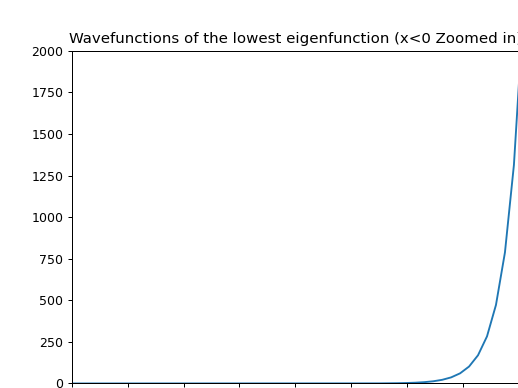

(0.0, 2000.0)

In [40]:
plt.figure()
plt.plot(X,vecs[0],'-')
plt.title('Wavefunctions of the lowest eigenfunction (x<0 Zoomed in)')
plt.xlabel('x')
plt.xlim([-L,0])
plt.ylim([0,2000])

As you can see from the plotted figure above, the wavefunction is approaching zero at the boundary ($x=-L$).

A zoomed-in plot of the lowest eigenfunction for $x>L$ is shown below:

<IPython.core.display.Javascript object>


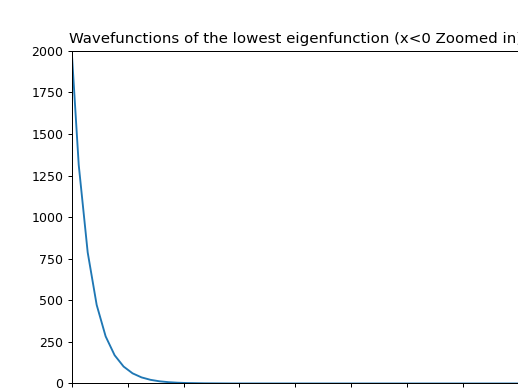

(0.0, 2000.0)

In [41]:
plt.figure()
plt.plot(X,vecs[0],'-')
plt.title('Wavefunctions of the lowest eigenfunction (x<0 Zoomed in)')
plt.xlabel('x')
plt.xlim([L,2*L])
plt.ylim([0,2000])

As you can see from the plotted figure above, the wavefunction is approaching zero at the boundary ($x=2L$).

#### c)Show the eigenvalues form a discrete spectrum for energies less than  $𝑈_0$ and a continuous spectrum for higher energies 


In [42]:
#cutoff = 20 # how many energy levels to trust from our computed results (probably shouldn't be more than 20 or so)
#psi = vecs[:cutoff].astype(np.complex64)
#E_eV = vals_eV[:cutoff]
print ("The eigenvalues are {}eV for N={}".format(vals_eV,N))

The eigenvalues are [5.00205895e-03 1.99759907e-02 4.48227110e-02 7.93681557e-02
 1.23345067e-01 1.76352553e-01 2.37754732e-01 3.06352920e-01
 3.78419534e-01 4.01461685e-01 4.05510961e-01 4.06114925e-01
 4.12954704e-01 4.21414847e-01 4.23727532e-01 4.34883446e-01
 4.44782678e-01 4.51940421e-01 4.62833190e-01 4.73918583e-01
 4.89548207e-01 4.97441908e-01 5.15552832e-01 5.32801844e-01
 5.44446292e-01 5.62639144e-01 5.79099416e-01 6.00223479e-01
 6.13535463e-01 6.37341665e-01 6.57977024e-01 6.77557173e-01
 6.97627588e-01 7.21404188e-01 7.47087260e-01 7.66254635e-01
 7.93066866e-01 8.17157418e-01 8.45295939e-01 8.66629270e-01
 8.97320489e-01 9.23995949e-01 9.52820725e-01 9.77998159e-01
 1.01036234e+00 1.04046765e+00 1.06965209e+00 1.09916652e+00
 1.13235797e+00 1.16562038e+00 1.19552234e+00 1.22903750e+00
 1.26305848e+00 1.29887786e+00 1.32996538e+00 1.36680606e+00
 1.40194187e+00 1.43975344e+00 1.47238781e+00 1.51186218e+00
 1.54836815e+00 1.58774470e+00 1.62212907e+00 1.66366189e+00
 1.7

By looking at the eigen-value for $N=200$ cases, we can find for eigenvalue is smaller than $U_{0}=0.4eV$, the eigenvalues have discrete values which are $E_{0}=0.005eV$, $E_{1}=0.02eV$, $E_{2}=0.045eV$, $E_{3}=0.08eV$, $E_{4}=0.123eV$, $E_{5}=0.176eV$, $E_{6}=0.238eV$, $E_{7}=0.306eV$, and $E_{7}=0.378eV$. When eigenvalue is larger than $U_{0}=0.4eV$, the eigenvalues have continuous energy spectrum. The energy spectrum for $N=200$ can alsobe found in the figure below, where we can see a discontinuity at $E=0.4eV$ on the energy spectrum. 

<IPython.core.display.Javascript object>


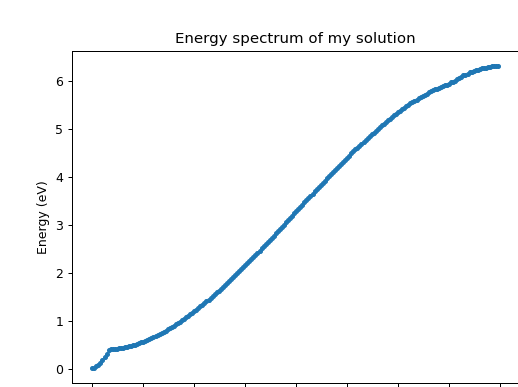

Text(0, 0.5, 'Energy (eV)')

In [43]:
plt.figure()
plt.plot(vals_eV,'.')
plt.title('Energy spectrum of my solution')
plt.xlabel('Level')
plt.ylabel('Energy (eV)')